In [1]:
import os
import pandas as pd
import math
import numpy
from matplotlib import pyplot as plt

def Manhattanplot(ASSOCFILE, title, causal_SNPs, savedir):
    # Load data
    assoc = pd.read_csv(ASSOCFILE, sep="\t").sort_values("BP")
    assoc = assoc[assoc["TEST"]=="ADD"]
    
    #print(assoc.head())

    # Plot
    fig = plt.figure()
    fig.set_size_inches((10, 5))
    ax = fig.add_subplot(111)

    # Your code should actually perform the scatter function
    # You might need to do some manipulations to your p-values first
    nlog10_pvals = [-math.log(pvalue, 10) for pvalue in assoc["P"]]
    ax.scatter(assoc["BP"], nlog10_pvals, s=20, zorder=2)

    # Plot p-value threshold of 10^-4 (here, represented at y = 4 due to the -log10()
    # operations we just did above)
    ax.hlines(3, 0, max(assoc["BP"]), colors="red")

    # Also plot the range of the LCT gene according to https://ghr.nlm.nih.gov/gene/LCT#location
    # for future reference
    BP_interest = (assoc[assoc["SNP"].isin(causal_SNPs)])["BP"]
    for bp in BP_interest:
        ax.vlines(bp, 0, max(nlog10_pvals), colors="lightgrey", linewidth=1, zorder=1)
    
    #ax.vlines(135837195, 0, max(nlog10_pvals), colors="#00ff00")

    ax.set_xlabel("Position (chr21)", size=15)
    ax.set_ylabel("-log10 P", size=1)
    ax.set_title(title)
    
    ax.set_xlim(left=0, right=max(assoc["BP"]))
    ymax = min(max(nlog10_pvals), 30)
    ax.set_ylim(bottom=0, top=ymax)
    ax.set_xticklabels(ax.get_xticks(), size=12)
    ax.set_yticklabels(ax.get_yticks(), size=12)
    
    

In [2]:
import numpy as np
import os
import pandas as pd

def QQPlot(ASSOCFILE, title, causal_SNPs, savedir):
    assoc = pd.read_csv(ASSOCFILE, sep="\t").sort_values("P")
    assoc = assoc[assoc["TEST"]=="ADD"]
    pvals = assoc["P"]
    
    #assoc["colour"] = "black"
    #assoc["colour"] = np.where(assoc["SNP"].isin(causal_SNPs), "green", "black")
    
    #print(assoc.colour.value_counts())
    
    fig = plt.figure()
    ax = fig.add_subplot(111)


    # Generate some random data from uniform distribution
    unif = list(np.random.uniform(0, 1, size=len(pvals)))
    unif.sort()

    max_obs = max( max(-1*np.log10([item for item in pvals if item >0])), max(-1*np.log10(pvals)))
    
    xmax = min(max_obs, 30)

    ax.scatter(-1*np.log10(unif), -1*np.log10(pvals), s=5, color="black")
    ax.plot([0,100],[0,100])
    ax.set_xlabel("Expected -log10 P", size=15)
    ax.set_ylabel("Observed -log10 P", size=15)
    ax.set_xlim(left=0, right=xmax)
    ax.set_ylim(bottom=0, top=xmax)
    ax.set_title(title)
    ax.set_xticklabels(ax.get_xticks(), size=12)
    ax.set_yticklabels(ax.get_yticks(), size=12)

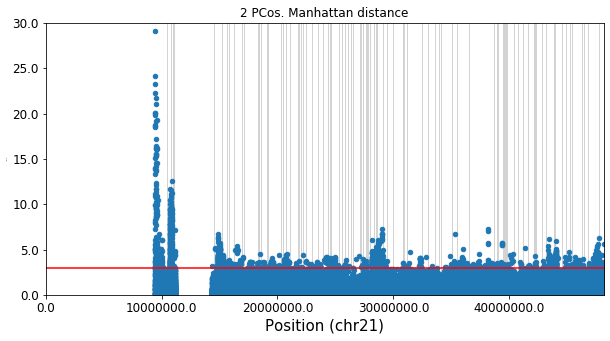

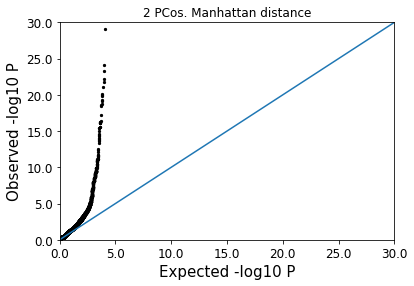

In [3]:
causal_SNPs = pd.read_csv("../GWASminiProject/Info about simulations/Causal SNPs/info_causal_SNPs_sim1.txt", sep="\t")["causal_SNP"]

OUTPREFIX1 = "../GWASminiProject/Runs/Noenvironmenteffect/"
OUTPREFIX2 = "../GWASminiProject/Runs/Yesenvironmenteffect/"
#TYPE = "PCA_HPS_whiten_False"
#PARAMS = "2"

TYPE = "t-SNE_HPS_metric_braycurtis_perplexity"
PARAMS = "3"

ASSOCFILE1 = os.path.join(OUTPREFIX1, TYPE, "results_" +PARAMS +".assoc.linear.tab")
ASSOCFILE2 = os.path.join(OUTPREFIX2, TYPE, "results_" +PARAMS +".assoc.linear.tab")

savedir1 = os.path.join(OUTPREFIX1, TYPE+PARAMS+"_manhattan.png")
savedir2 = os.path.join(OUTPREFIX2, TYPE+PARAMS+"_manhattan.png")

#Manhattanplot(ASSOCFILE1, "2 PCos. Manhattan distance", causal_SNPs, savedir1)
#QQPlot(ASSOCFILE1, "2 PCos. Manhattan distance", causal_SNPs, savedir1)

Manhattanplot(ASSOCFILE2, "2 PCos. Manhattan distance", causal_SNPs, savedir2)
QQPlot(ASSOCFILE2, "2 PCos. Manhattan distance", causal_SNPs, savedir2)

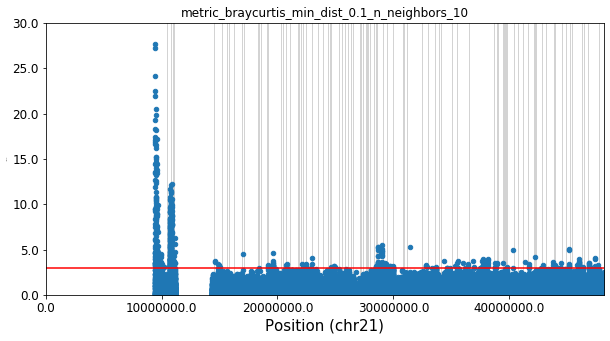

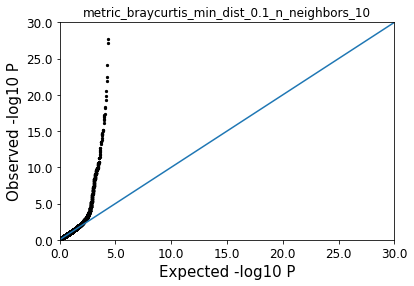

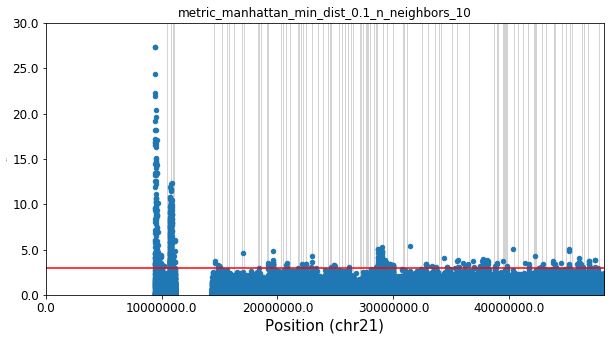

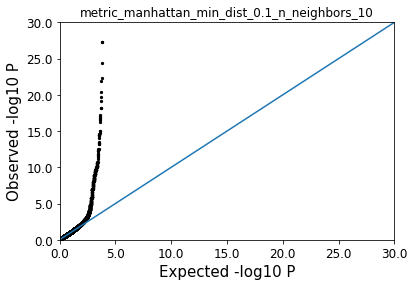

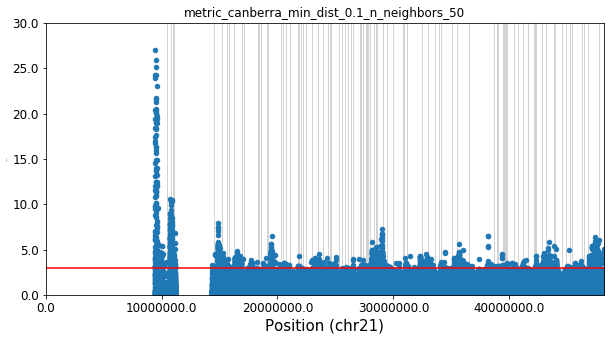

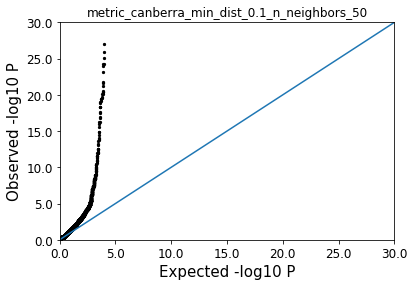

In [137]:
causal_SNPs = pd.read_csv("../GWASminiProject/Info about simulations/Causal SNPs/info_causal_SNPs_sim1.txt", sep="\t")["causal_SNP"]

OUTPREFIX1 = "../GWASminiProject/Runs/Noenvironmenteffect/"
OUTPREFIX2 = "../GWASminiProject/Runs/Yesenvironmenteffect/"
#TYPE = "PCA_HPS_whiten_False"
#PARAMS = "2"

########################################################3

TYPE = "UMAP_HPS"
PARAMS = "metric_braycurtis_min_dist_0.1_n_neighbors_10"

ASSOCFILE1 = os.path.join(OUTPREFIX1, TYPE, "results_" +PARAMS +".assoc.linear.tab")
ASSOCFILE2 = os.path.join(OUTPREFIX2, TYPE, "results_" +PARAMS +".assoc.linear.tab")

savedir1 = os.path.join(OUTPREFIX1, TYPE+PARAMS+"_manhattan.png")
savedir2 = os.path.join(OUTPREFIX2, TYPE+PARAMS+"_manhattan.png")

#Manhattanplot(ASSOCFILE1, "2 PCos. Manhattan distance", causal_SNPs, savedir1)
#QQPlot(ASSOCFILE1, "2 PCos. Manhattan distance", causal_SNPs, savedir1)

Manhattanplot(ASSOCFILE2, PARAMS, causal_SNPs, savedir2)
QQPlot(ASSOCFILE2, PARAMS, causal_SNPs, savedir2)

########################################################3

TYPE = "UMAP_HPS"
PARAMS = "metric_manhattan_min_dist_0.1_n_neighbors_10"

ASSOCFILE1 = os.path.join(OUTPREFIX1, TYPE, "results_" +PARAMS +".assoc.linear.tab")
ASSOCFILE2 = os.path.join(OUTPREFIX2, TYPE, "results_" +PARAMS +".assoc.linear.tab")

savedir1 = os.path.join(OUTPREFIX1, TYPE+PARAMS+"_manhattan.png")
savedir2 = os.path.join(OUTPREFIX2, TYPE+PARAMS+"_manhattan.png")

#Manhattanplot(ASSOCFILE1, "2 PCos. Manhattan distance", causal_SNPs, savedir1)
#QQPlot(ASSOCFILE1, "2 PCos. Manhattan distance", causal_SNPs, savedir1)

Manhattanplot(ASSOCFILE2, PARAMS, causal_SNPs, savedir2)
QQPlot(ASSOCFILE2, PARAMS, causal_SNPs, savedir2)

########################################################3

TYPE = "UMAP_HPS"
PARAMS = "metric_canberra_min_dist_0.1_n_neighbors_50"

ASSOCFILE1 = os.path.join(OUTPREFIX1, TYPE, "results_" +PARAMS +".assoc.linear.tab")
ASSOCFILE2 = os.path.join(OUTPREFIX2, TYPE, "results_" +PARAMS +".assoc.linear.tab")

savedir1 = os.path.join(OUTPREFIX1, TYPE+PARAMS+"_manhattan.png")
savedir2 = os.path.join(OUTPREFIX2, TYPE+PARAMS+"_manhattan.png")

#Manhattanplot(ASSOCFILE1, "2 PCos. Manhattan distance", causal_SNPs, savedir1)
#QQPlot(ASSOCFILE1, "2 PCos. Manhattan distance", causal_SNPs, savedir1)

Manhattanplot(ASSOCFILE2, PARAMS, causal_SNPs, savedir2)
QQPlot(ASSOCFILE2, PARAMS, causal_SNPs, savedir2)

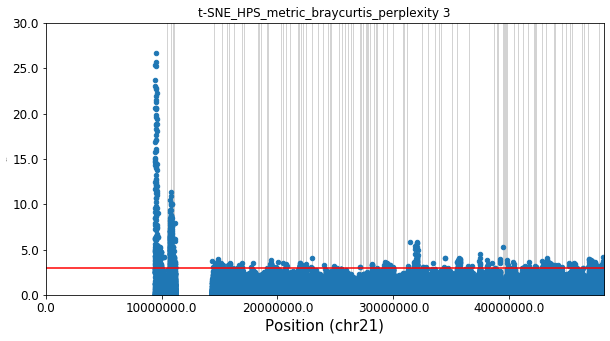

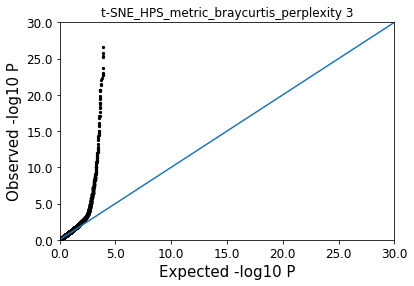

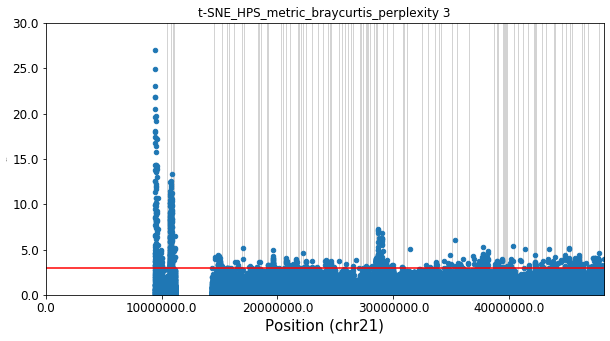

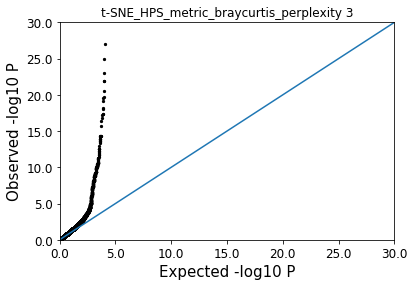

In [134]:
causal_SNPs = pd.read_csv("../GWASminiProject/Info about simulations/Causal SNPs/info_causal_SNPs_sim1.txt", sep="\t")["causal_SNP"]

OUTPREFIX1 = "../GWASminiProject/Runs/Noenvironmenteffect/"
OUTPREFIX2 = "../GWASminiProject/Runs/Yesenvironmenteffect/"
TYPE = "PCoA_HPS_metric_manhattan"
PARAMS = "2"

#TYPE = "t-SNE_HPS_metric_braycurtis_perplexity"
#PARAMS = "3"

ASSOCFILE1 = os.path.join(OUTPREFIX1, TYPE, "results_" +PARAMS +".assoc.linear.tab")
ASSOCFILE2 = os.path.join(OUTPREFIX2, TYPE, "results_" +PARAMS +".assoc.linear.tab")

savedir1 = os.path.join(OUTPREFIX1, TYPE+PARAMS+"_manhattan.png")
savedir2 = os.path.join(OUTPREFIX2, TYPE+PARAMS+"_manhattan.png")

Manhattanplot(ASSOCFILE1, "t-SNE_HPS_metric_braycurtis_perplexity 3", causal_SNPs, savedir1)
QQPlot(ASSOCFILE1, "t-SNE_HPS_metric_braycurtis_perplexity 3", causal_SNPs, savedir1)

Manhattanplot(ASSOCFILE2, "t-SNE_HPS_metric_braycurtis_perplexity 3", causal_SNPs, savedir2)
QQPlot(ASSOCFILE2, "t-SNE_HPS_metric_braycurtis_perplexity 3", causal_SNPs, savedir2)

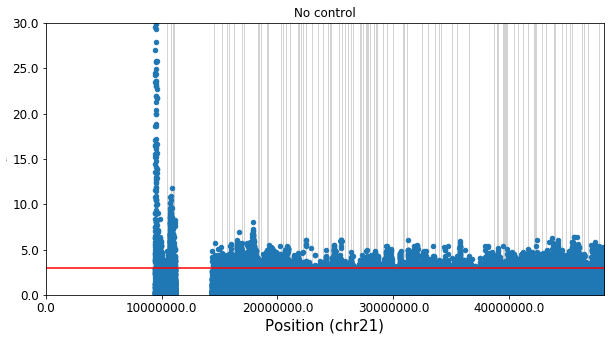

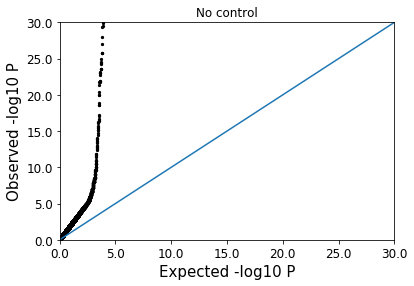

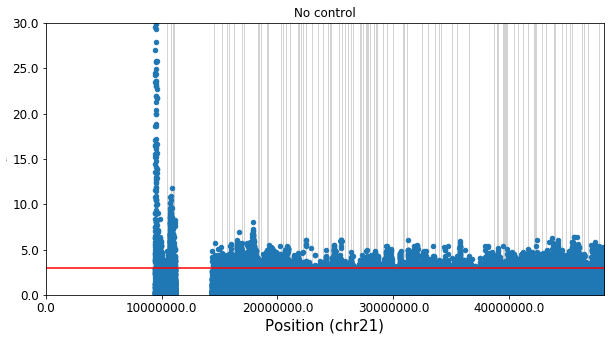

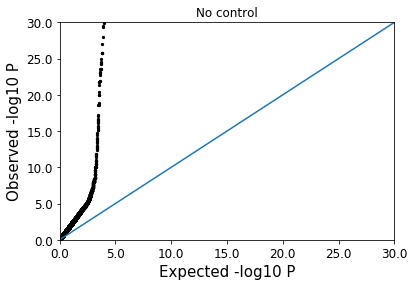

In [133]:
causal_SNPs = pd.read_csv("../GWASminiProject/Info about simulations/Causal SNPs/info_causal_SNPs_sim1.txt", sep="\t")["causal_SNP"]

OUTPREFIX1 = "../GWASminiProject/Runs/Noenvironmenteffect/"
OUTPREFIX2 = "../GWASminiProject/Runs/Yesenvironmenteffect/"
#TYPE = "PCA_HPS_whiten_False"
#PARAMS = "2"

TYPE = "Nocontrol"
PARAMS = ""

ASSOCFILE1 = os.path.join(OUTPREFIX1, TYPE, "results" +PARAMS +".assoc.linear.tab")
ASSOCFILE2 = os.path.join(OUTPREFIX2, TYPE, "results" +PARAMS +".assoc.linear.tab")

savedir1 = os.path.join(OUTPREFIX1, TYPE+PARAMS+"_manhattan.png")
savedir2 = os.path.join(OUTPREFIX2, TYPE+PARAMS+"_manhattan.png")

Manhattanplot(ASSOCFILE1, "No control", causal_SNPs, savedir1)
QQPlot(ASSOCFILE1, "No control", causal_SNPs, savedir1)

Manhattanplot(ASSOCFILE2, "No control", causal_SNPs, savedir2)
QQPlot(ASSOCFILE2, "No control", causal_SNPs, savedir2)